<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Assignment - EDA for Regression Project</h1>
</div>

© Copyright Machine Learning Plus

Content:
- Setup Environment
- Data Overview
- Univariate Analysis
- Data Preprocessing
- Bivariate Analysis 
    - Significance Tests
- EDA 
    - Get business insights

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Setup Environment</h2>
</div>

- Install the required packages 
- Import all the packages in 1st cell itself
- Set the options for data visualizations

In [2]:
# Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
from   scipy.stats import chi2_contingency
import statsmodels.api as sm
from   statsmodels.stats.anova import anova_lm
from   statsmodels.formula.api import ols
from   math import log, e

import warnings


# Set Options
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Data Overview</h2>
</div>

The goal of this section is to :
- Load the data
- Shape of the data
- Explore the features

Load the data using `pd.read_csv()`. 

In [3]:
df = pd.read_csv("C:/Users/maste/Documents/Personal/ML+/Learning/Data preprocessing and EDA/Datasets_Course_Preprocessing_EDA/Life Expectancy Data.csv")

In [4]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


#### Shape of dataframe

In [5]:
# Shape of dataframe
df.shape

(2938, 22)

### Data Description

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories: Immunization related factors, Mortality factors, Economical factors and Social factors.

Columns Description:
- Country - Country
- Year - Year

- Status - Developed or Developing status

- Life expectancy - Life Expectancy in age

- Adult Mortality - Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

- infant deaths - Number of Infant Deaths per 1000 population

- Alcohol - Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

- percentage expenditure - Expenditure on health as a percentage of Gross Domestic Product per capita(%)

- Hepatitis B - Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

- Measles - Measles - number of reported cases per 1000 population

- BMI - Average Body Mass Index of entire population

- under-five deaths - Number of under-five deaths per 1000 population

- Polio - Polio (Pol3) immunization coverage among 1-year-olds (%)

- Total expenditure - General government expenditure on health as a percentage of total government expenditure (%)

- Diphtheria - Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

- HIV/AIDS - Deaths per 1 000 live births HIV/AIDS (0-4 years)

- GDP - Gross Domestic Product per capita (in USD)

- Population - Population of the country

- thinness 1-19 years - Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

- thinness 5-9 years - Prevalence of thinness among children for Age 5 to 9(%)

- Income composition of resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

- Schooling - Number of years of Schooling(years)

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Univariate Analysis</h2>
</div>

The goal of this section is to:
- Get the summary of data - mean, std, count, quartiles and range
- Get additonal univariate stats of data
    - Missing Values
    - Unique Values
    - Data Type
- Check the distribution of target variable

### Q3.1. Get the summary of data - mean, std, count, quartiles and range

In [6]:
#central tendency
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Q3.2. Get additonal univariate stats of data
- Missing Values
- Unique Values
- Data Type

In [7]:
#we have calculate total no of missing value and percentage of missing value and highlighted where missing % is more than 2
columns= pd.Series(df.columns.values.tolist())
NACount= df.isna().sum()
overallcount=df.shape[0]
missingperce=NACount.transform(lambda x : (x/overallcount)*100)
pd.concat([NACount,missingperce],axis=1).style.applymap(lambda x : 'background-color:lightgreen' if x > 2 else None,subset=pd.IndexSlice[:,1])



,0,1
Country,0,0.000000
Year,0,0.000000
Status,0,0.000000
Life expectancy,10,0.340368
Adult Mortality,10,0.340368
infant deaths,0,0.000000
Alcohol,194,6.603131
percentage expenditure,0,0.000000
Hepatitis B,553,18.822328
Measles,0,0.000000


In [8]:

df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Q3.3. Check the distribution of target variable

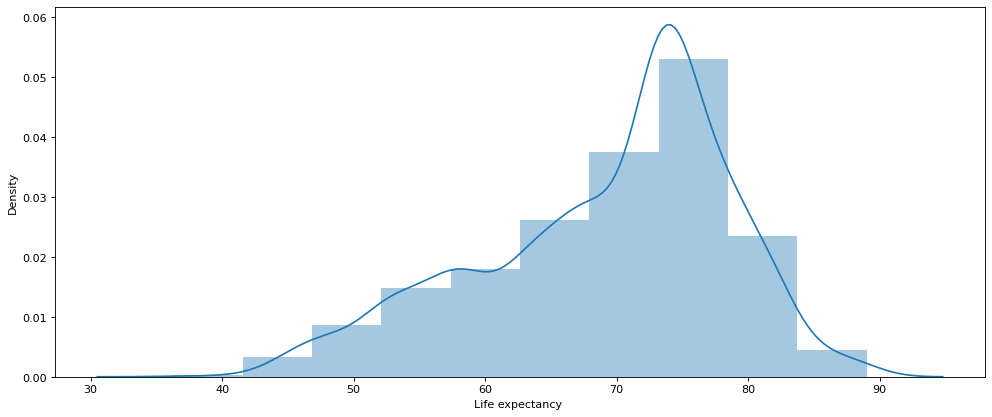

In [9]:
plt.figure(figsize=(15,6),dpi=80)
sns.distplot(df['Life expectancy '],bins=10,kde=True)
#sns.histplot(data=df, x=df['Life expectancy '],kde=True)
#plt.xticks(np.arange(30,len(df['Life expectancy ']),1))
plt.show()


<Axes: xlabel='Life expectancy '>

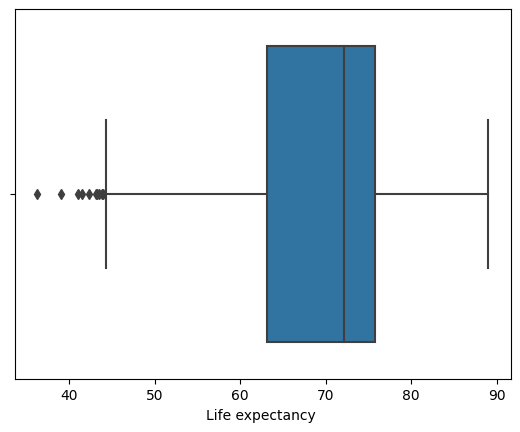

In [10]:
sns.boxplot(data=df,x=df['Life expectancy '])

### Q3.4. Get insights from the section

1)status and cuntry needs be encoded in numerical col
2) most column values are having different scale
3) alcohol, population,gdp, hepatitis b ,schooling have more than 2% missing values which needs to be imputed
4)Target varibale is having normal distribution


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Data Preprocessing</h2>
</div>

### Q4.1. Check if there are extra spaces in the column names. If yes, remove the extra spaces in the column names

### 4.2. Treat the missing values is the data
- Drop the rows with missing values in the target variable
- Replace the missing values with mean in other variables

In [11]:
df.dropna(inplace=True,subset=['Life expectancy '],how='all')

df.shape
df['Country'].isna().sum()

0

<Axes: >

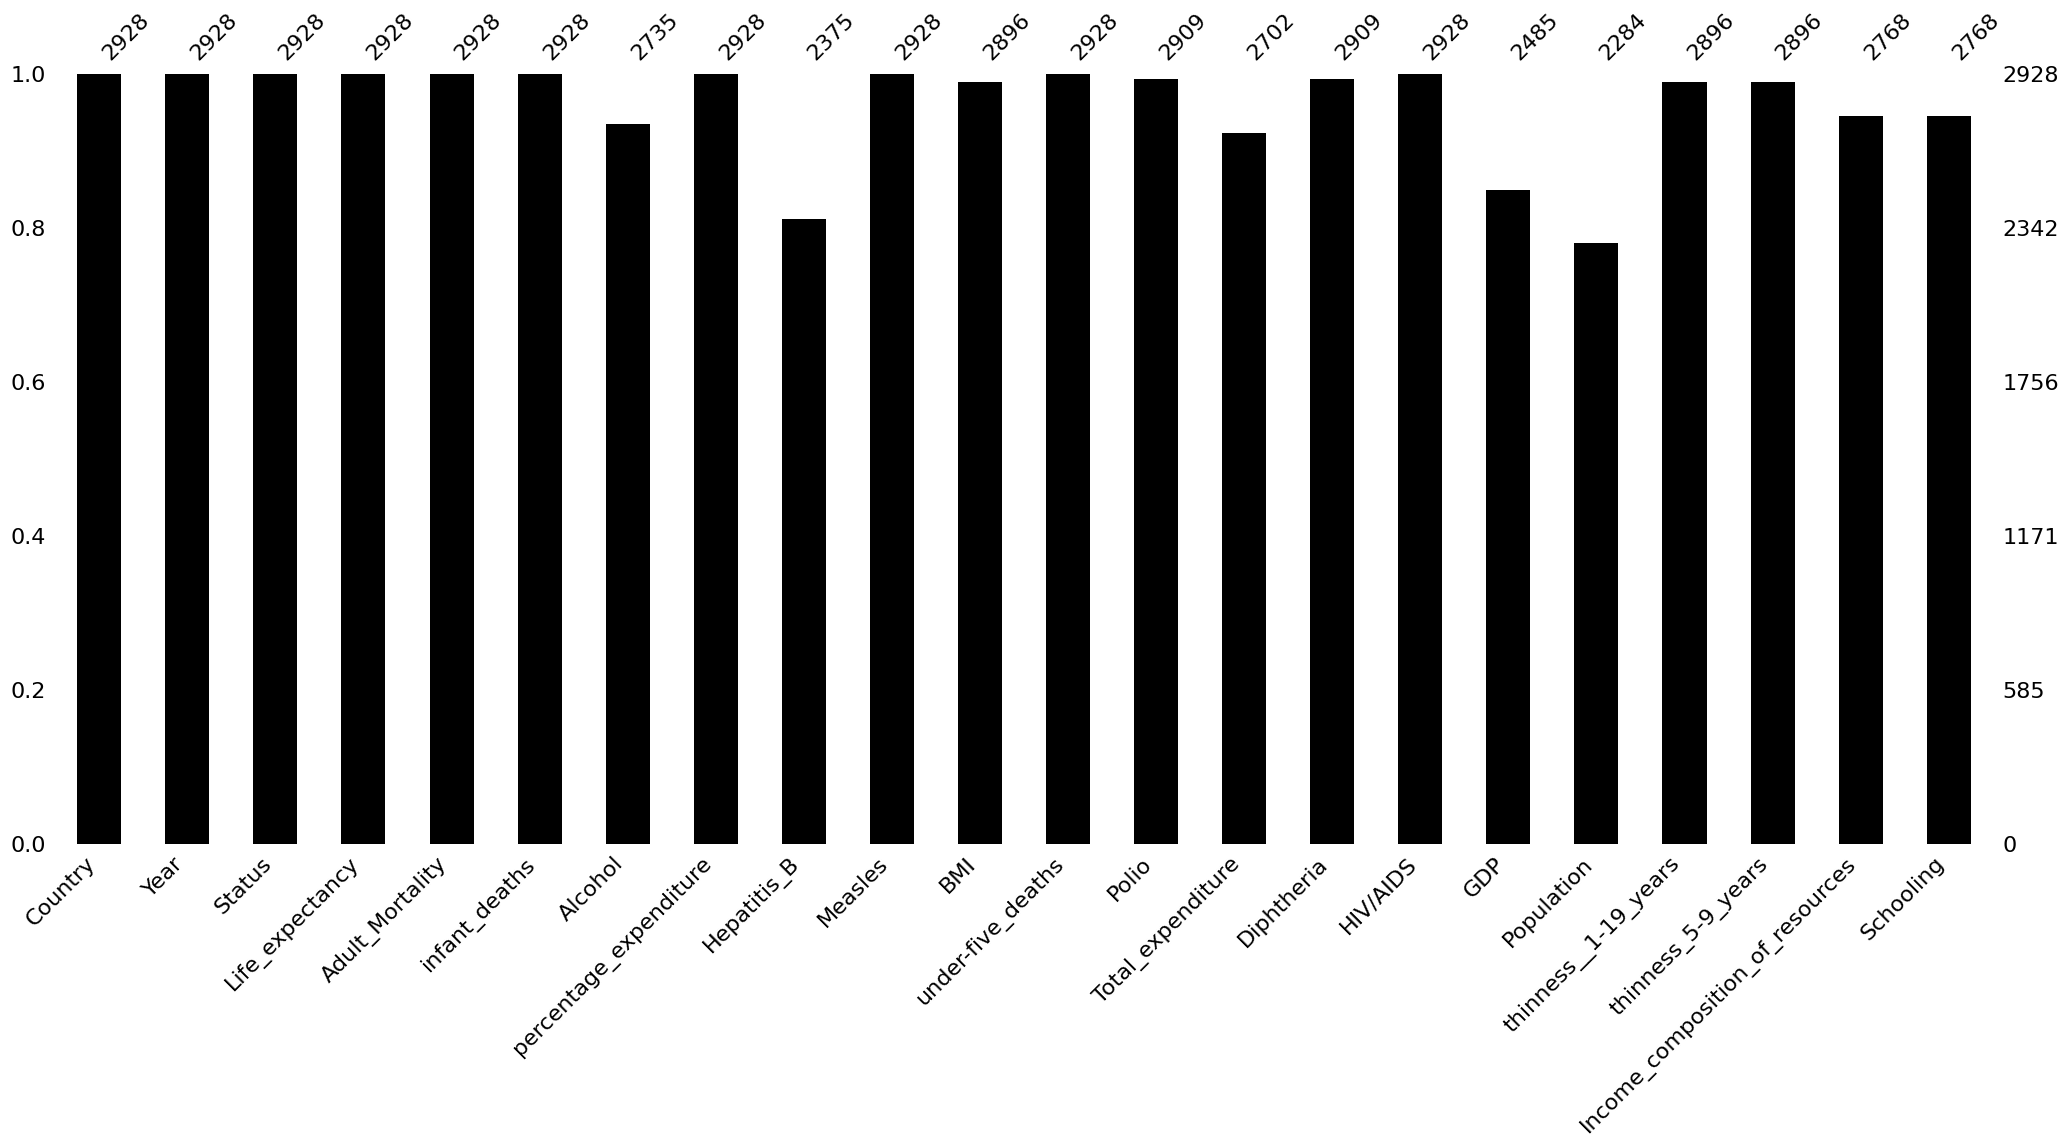

In [12]:
import missingno as msno



df=df.rename(columns= lambda x: x.strip())
df.columns=df.columns.str.replace(' ','_')
msno.bar(df,color='black')

In [13]:
df[df.isna().any(axis=1)]


,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,47.0,23,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,46.1,23,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,45.3,24,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,44.4,25,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,17.6,62,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,17.3,66,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,17.1,70,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,16.8,72,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


<Axes: >

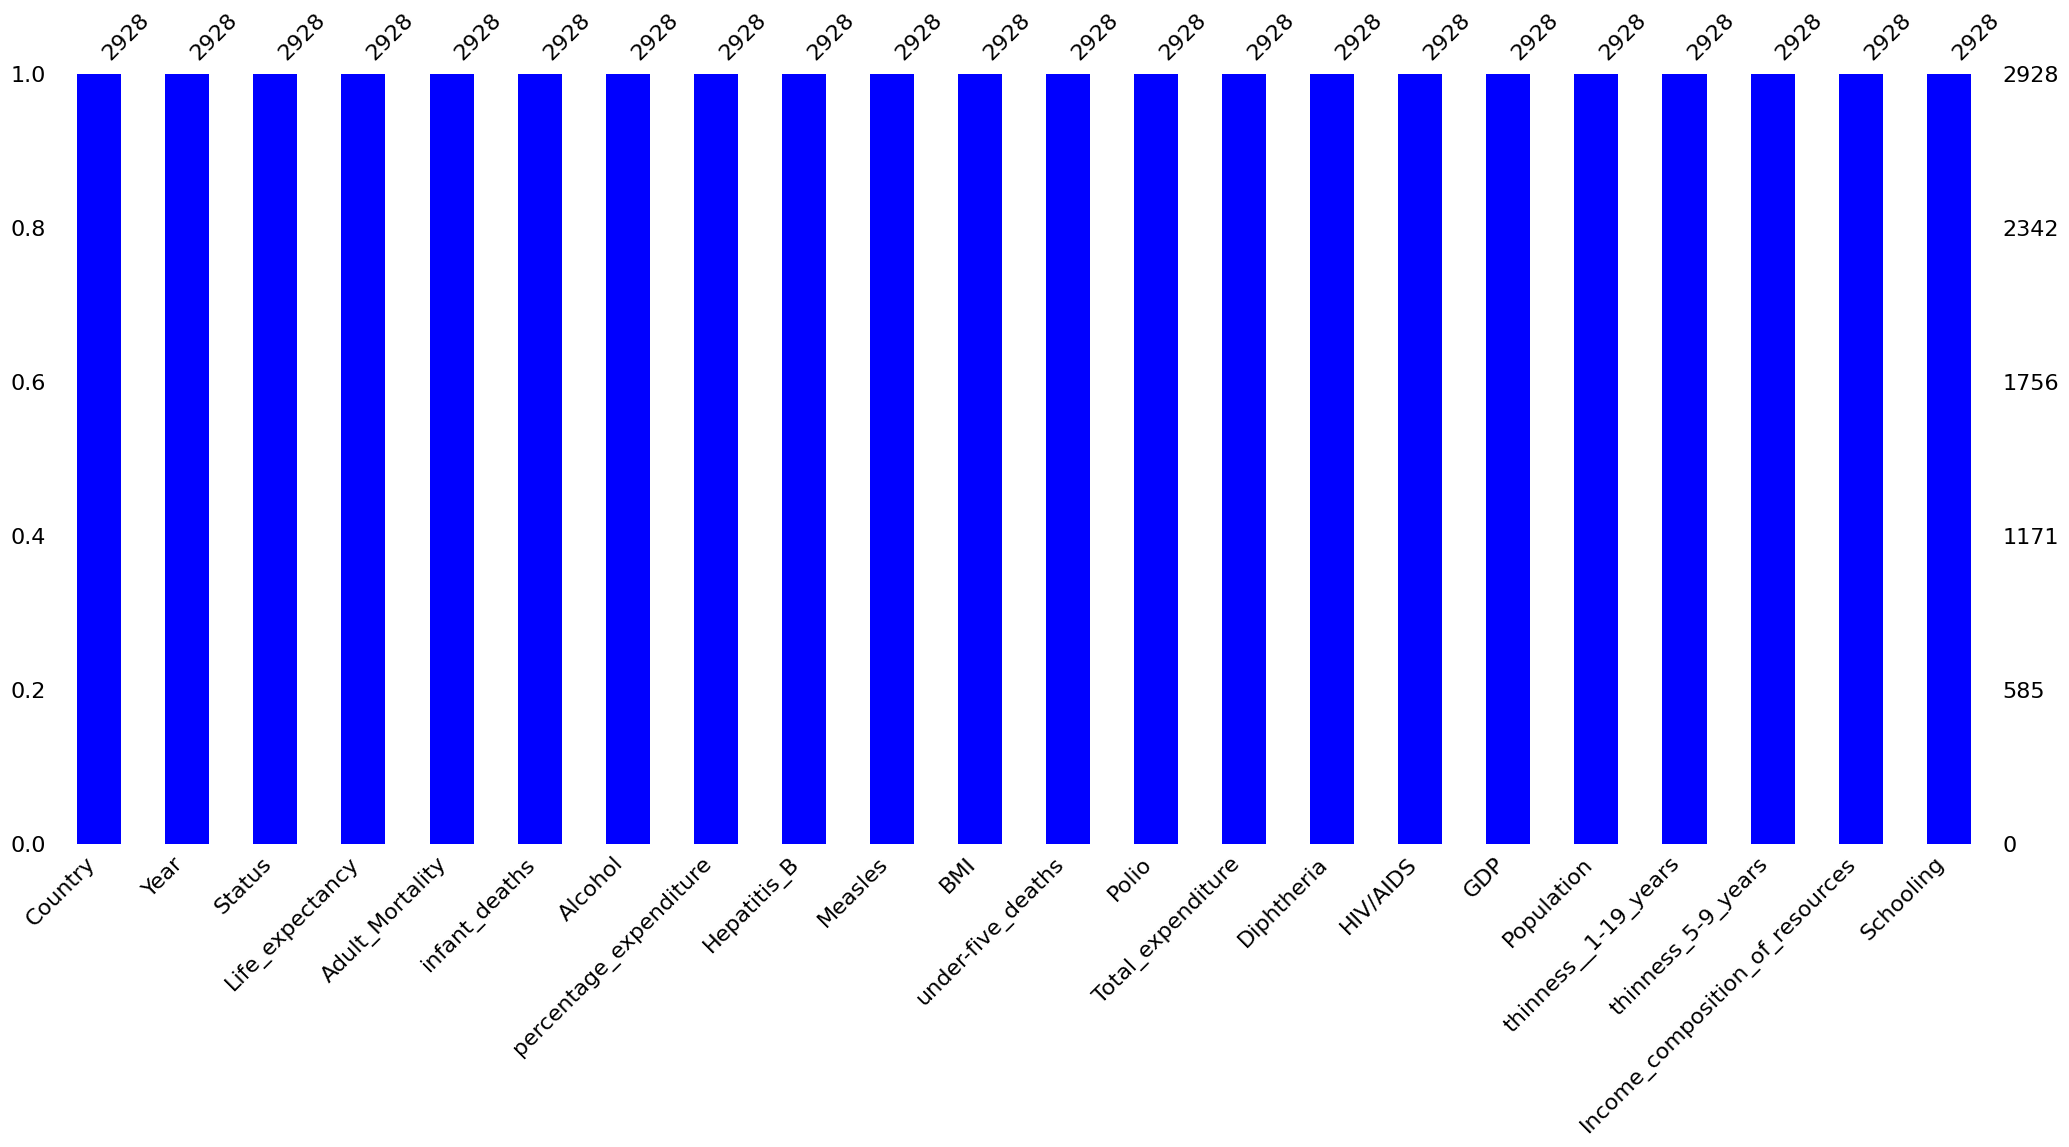

In [14]:
#impution using mean technique
df_imputed=df.fillna(df.mean())
msno.bar(df_imputed,color='blue')

<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. Bivariate Analysis - Statistical Significance Tests</h2>
</div>

### Q5.1. Check the statistical significance of categorical variables with target class using ANOVA test

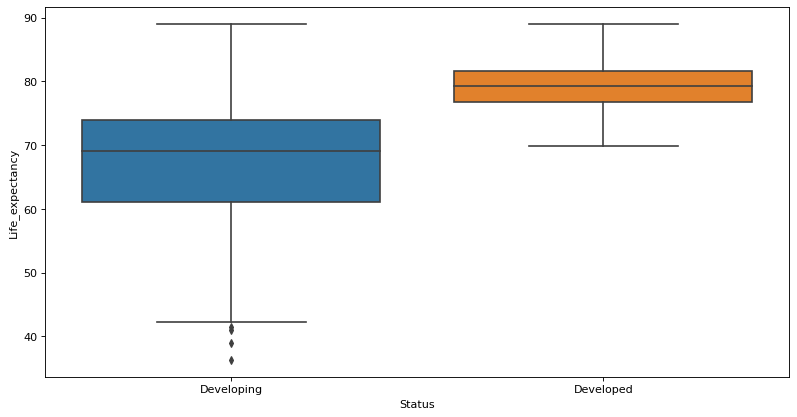

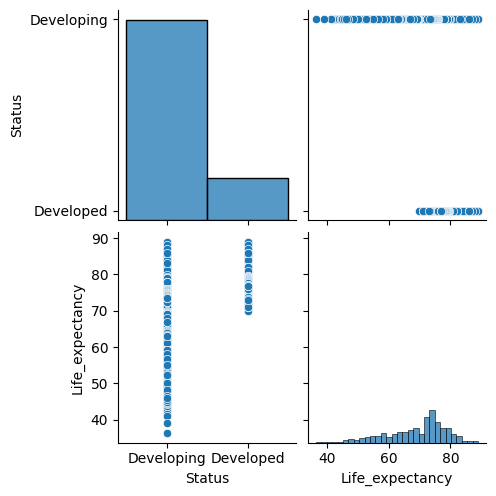

((array([-3.49536992, -3.2512209 , -3.11618381, ...,  3.11618381,
          3.2512209 ,  3.49536992]),
  array([36.3, 39. , 41. , ..., 89. , 89. , 89. ])),
 (9.32217815042338, 69.22493169398908, 0.9779367640077105))

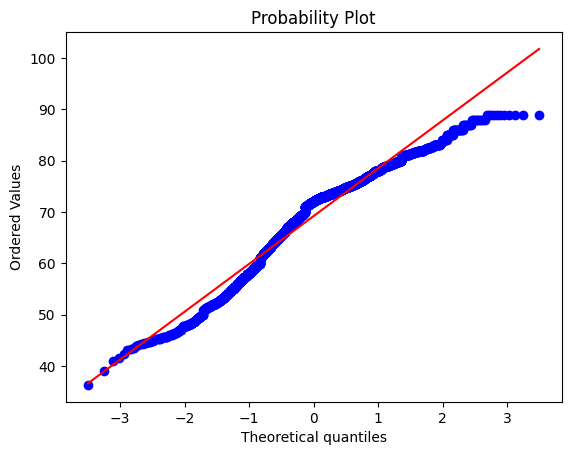

In [15]:
from scipy.stats import f_oneway
import scipy.stats as stats

df_imputed['Status'].value_counts()
y=df_imputed['Life_expectancy']
plt.figure(figsize=(12,6),dpi=80)
sns.boxplot(x=df_imputed['Status'],y=y,data=df_imputed)
sns.pairplot(df_imputed,vars= df_imputed.columns[2:4])

plt.show()

stats.probplot(y,plot=plt,dist='norm')

In [16]:
num_col = df_imputed.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df_imputed.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

num_col=num_col.tolist()
num_col.remove('Year')

cat_col=cat_col.tolist()
cat_col.append('Year')
cat_col

Numerical columns: 
 Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness__1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


['Country', 'Status', 'Year']

In [17]:
#df[df['Status']=="Developing"]['Life_expectancy']
df_imputed['Life_expectancy'][df_imputed['Status']=='Developing']
f,p=f_oneway(df_imputed[df_imputed['Status']=="Developing"]['Life_expectancy'],df[df['Status']=="Developed"]['Life_expectancy'])
f1,p1=f_oneway(df_imputed['Life_expectancy'][df_imputed['Status']=='Developing'],df_imputed['Life_expectancy'][df['Status']=='Developed'])

print(f' against independent variable life expectancy- f-stat {f} and p-value{p:.3f}')
print(f' against independent variable status- f-stat {f1:.0f} and p-value{p1:.3f}')


 against independent variable life expectancy- f-stat 886.1555582795149 and p-value0.000
 against independent variable status- f-stat 886 and p-value0.000


In [18]:
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
significant_cat_col=[]

alpha=0.05
for col in cat_col:
    model=ols('Life_expectancy ~ C('+ col +')',data=df_imputed).fit()
    print(f' anova model stats are p value for {col} is ({model.f_pvalue:.3f})')
    res=sm.stats.anova_lm(model,type=2)
    
    if model.f_pvalue<alpha:
        significant_cat_col.append(col)
    
    
    
significant_cat_col
res

 anova model stats are p value for Country is (0.000)
 anova model stats are p value for Status is (0.000)
 anova model stats are p value for Year is (0.000)


,df,sum_sq,mean_sq,F,PR(>F)
C(Year),15.0,7750.137691,516.675846,5.837497,4.508350e-12
Residual,2912.0,257740.622295,88.509829,NaN,NaN


as p value is less than alpha , all three cat columns are statiscally imprtant for the model

### Q5.2. Check the statistical significance of numerical variables with target variable using correlation test

In [19]:
significant_num_col=[]
from scipy.stats import pearsonr
for col in num_col:
    corr,p=pearsonr(df_imputed[col].astype(float),df_imputed['Life_expectancy'])
    print(f' p-value for {col} is {p:.4f} and person correlation coeff is {corr:.4f}')
    if p<alpha:
          significant_num_col.append(col)
significant_num_col

 p-value for Life_expectancy is 0.0000 and person correlation coeff is 1.0000
 p-value for Adult_Mortality is 0.0000 and person correlation coeff is -0.6964
 p-value for infant_deaths is 0.0000 and person correlation coeff is -0.1966
 p-value for Alcohol is 0.0000 and person correlation coeff is 0.3924
 p-value for percentage_expenditure is 0.0000 and person correlation coeff is 0.3819
 p-value for Hepatitis_B is 0.0000 and person correlation coeff is 0.2046
 p-value for Measles is 0.0000 and person correlation coeff is -0.1576
 p-value for BMI is 0.0000 and person correlation coeff is 0.5625
 p-value for under-five_deaths is 0.0000 and person correlation coeff is -0.2225
 p-value for Polio is 0.0000 and person correlation coeff is 0.4626
 p-value for Total_expenditure is 0.0000 and person correlation coeff is 0.2096
 p-value for Diphtheria is 0.0000 and person correlation coeff is 0.4764
 p-value for HIV/AIDS is 0.0000 and person correlation coeff is -0.5566
 p-value for GDP is 0.0000

['Life_expectancy',
 'Adult_Mortality',
 'infant_deaths',
 'Alcohol',
 'percentage_expenditure',
 'Hepatitis_B',
 'Measles',
 'BMI',
 'under-five_deaths',
 'Polio',
 'Total_expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'thinness__1-19_years',
 'thinness_5-9_years',
 'Income_composition_of_resources',
 'Schooling']

# all the coloumns except population are significantly affecting the target variable


<div class="alert alert-info" style="background-color:#006666; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. Exploratory Data Analysis</h2>
</div>

Exploratory data analysis is an approach to analyze data sets to find out patterns, insights and see if any of the variables can be useful in predicting the y variables. Visual methods are often used to summarize the data. Primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing tasks.

### Q6.1. Check for multicollinearity in the columns 
- Compute the correlation matrix 
- Plot it using heatmap

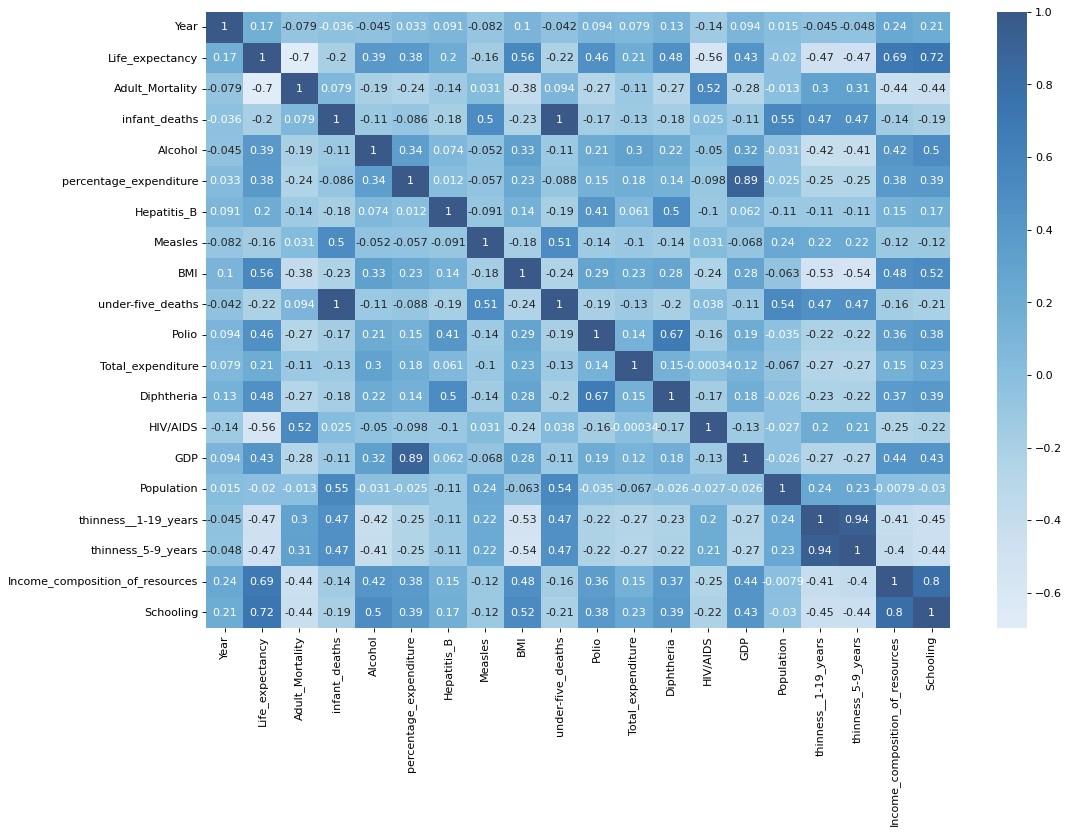

In [20]:
df_imputed.corr()
plt.figure(figsize=(15,10),dpi=80)
sns.heatmap(df_imputed.corr(),center=0,cmap='Blues',annot=True,alpha=0.8)
plt.show()

## Analyze the effect of categorical columns on the target variable

### Q6.2 Check the distribution of Status variable and see how it affects the target variable

<Axes: xlabel='Status', ylabel='Count'>

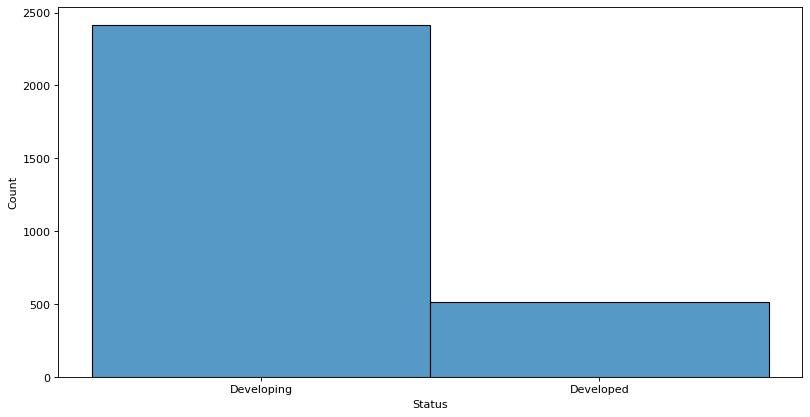

In [21]:
plt.figure(figsize=(12,6),dpi=80)
sns.histplot(df['Status'])

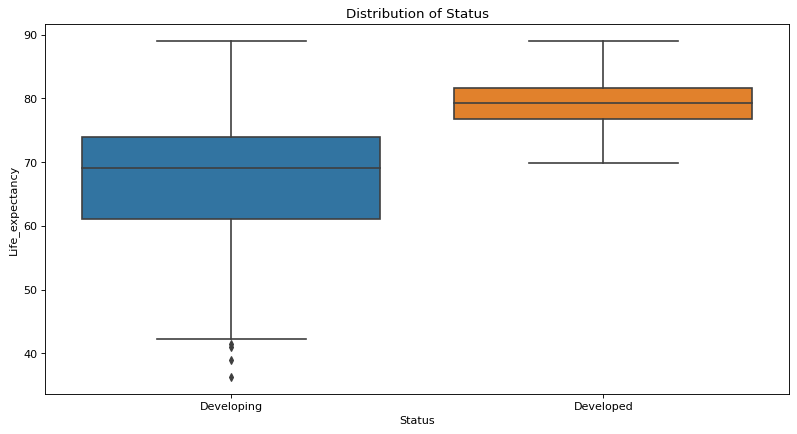

In [22]:
plt.figure(figsize=(12,6),dpi=80)
sns.boxplot(data=df_imputed, x=df_imputed['Status'],y=df_imputed['Life_expectancy'])

plt.title("Distribution of Status")
plt.show()



interfrence:
    there are only 2 groups for status feature
    life expectancy is more for developed countries

### Q6.3 Check the distribution of Country variable and see how it affects the target variable

its difficult to analyze the life expec for every group of country so we will look only for top 10 and botton 10 values 


<Figure size 16000x8000 with 0 Axes>

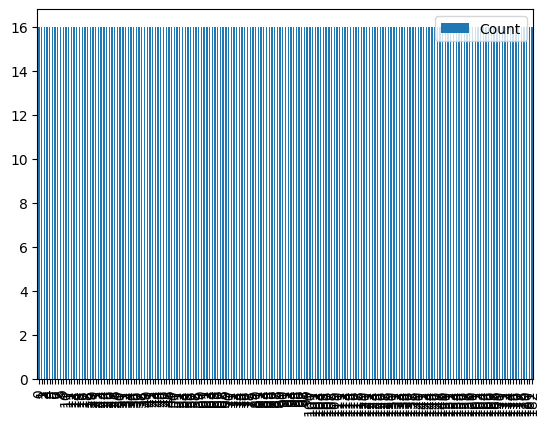

In [23]:
df_imputed['Country'].nunique()
plt.figure(figsize=(100,50),dpi=160)
df_imputed['Country'].value_counts().reset_index(name='Count').plot(kind='bar')
print('its difficult to analyze the life expec for every group of country so we will look only for top 10 and botton 10 values ')


In [24]:
df_imputed.groupby('Country')['Life_expectancy'].mean().reset_index(name='mean').sort_values(by='mean',ascending=False).head(10)


,Country,mean
82,Japan,82.53750
156,Sweden,82.51875
73,Iceland,82.44375
157,Switzerland,82.33125
58,France,82.21875
80,Italy,82.18750
151,Spain,82.06875
7,Australia,81.81250
119,Norway,81.79375
30,Canada,81.68750


In [25]:
df_imputed.groupby('Country')['Life_expectancy'].mean().reset_index(name='mean').sort_values(by='mean',ascending=False).tail(10)


,Country,mean
118,Nigeria,51.35625
155,Swaziland,51.32500
182,Zimbabwe,50.48750
43,Côte d'Ivoire,50.38750
32,Chad,50.38750
98,Malawi,49.89375
3,Angola,49.01875
92,Lesotho,48.78125
31,Central African Republic,48.51250
143,Sierra Leone,46.11250


interfernce:
   japan has highest life expectancy
   sierra leone has low life expectancy

### Q6.4. Check the distribution of Year variable and see how it affects the target variable

<Axes: xlabel='Year', ylabel='count'>

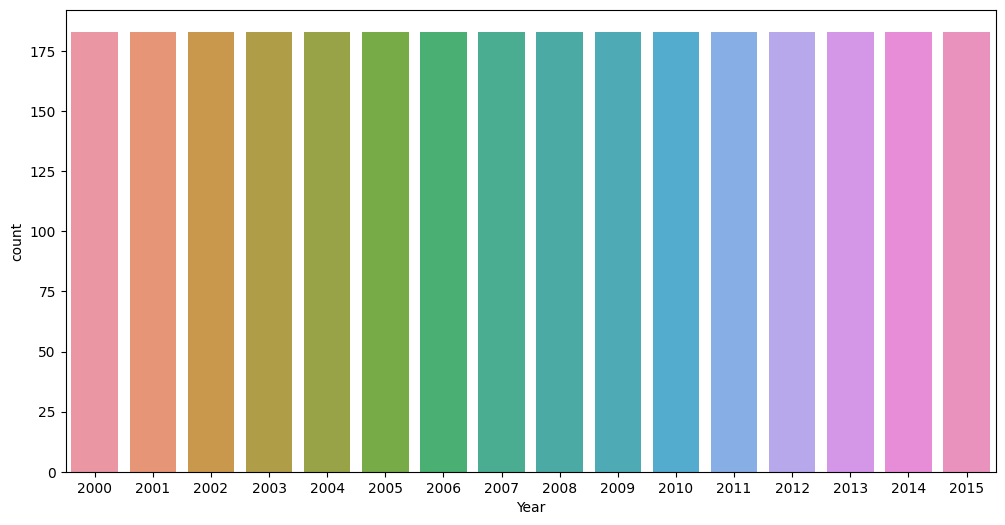

In [26]:
df_imputed['Year'].nunique()
df_imputed[['Year','Life_expectancy']]
plt.figure(figsize=(12,6))
#sns.histplot(x=df_imputed['Year'],bins=16,binwidth=0.5,color='Blue')
sns.countplot(x=df_imputed['Year'],data=df_imputed)

<Axes: xlabel='Year', ylabel='mean'>

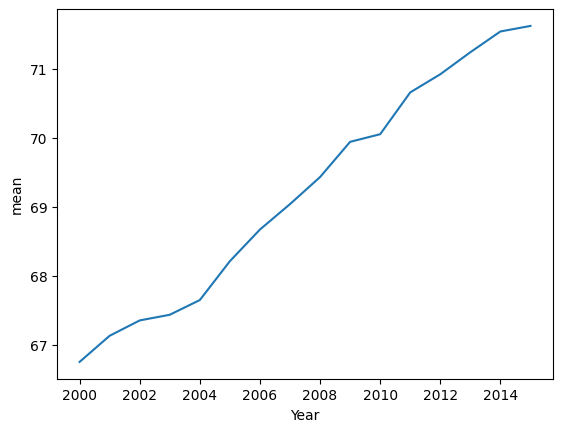

In [27]:
temp =df_imputed.groupby('Year')['Life_expectancy'].mean().reset_index(name='mean').sort_values(by='mean',ascending=False)
sns.lineplot(data=temp,x=temp['Year'],y=temp['mean'])

interference:
    life expec increasing with every year
    life expectancy is highest in 2015

## Analyze the effect of numerical columns on the target variable

### Q6.5. Check the distribution of Adult Mortality variable and see how it affects the target variable

In [28]:
df_imputed[['Adult_Mortality','Life_expectancy']]



,Adult_Mortality,Life_expectancy
0,263.0,65.0
1,271.0,59.9
2,268.0,59.9
3,272.0,59.5
4,275.0,59.2
...,...,...
2933,723.0,44.3
2934,715.0,44.5
2935,73.0,44.8
2936,686.0,45.3


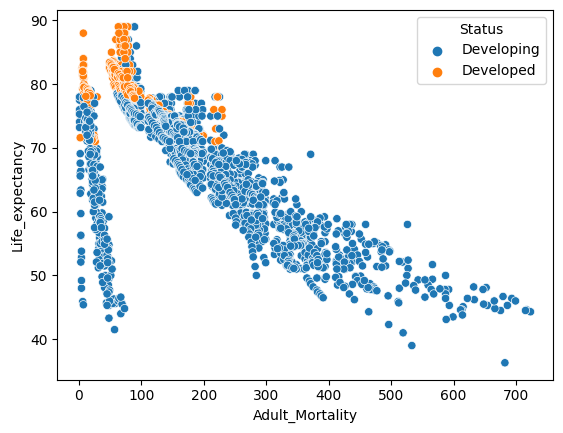

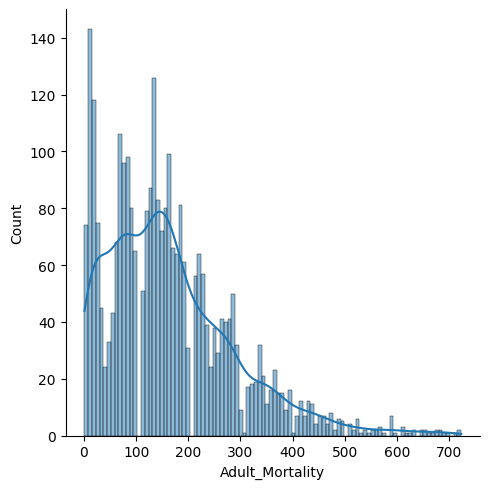

In [29]:

sns.scatterplot(data=df_imputed,x=df_imputed['Adult_Mortality'],y=df_imputed['Life_expectancy'],hue='Status')
sns.displot(x=df_imputed['Adult_Mortality'],bins=100,kde=True)
plt.show()


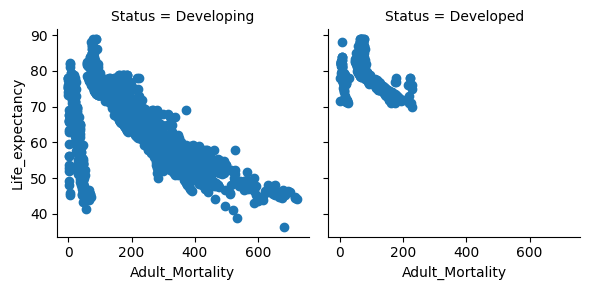

In [30]:
g=sns.FacetGrid(df_imputed,col='Status')
g.map(plt.scatter,'Adult_Mortality','Life_expectancy')
plt.show()

interference:
    adult mortality show two different pattern
    AM has negative correlation with life expectancy

### Q6.6. Check the distribution of Thinness 5-9 years variable and see how it affects the target variable

In [31]:
df=df_imputed
df[['thinness_5-9_years','Life_expectancy']]



,thinness_5-9_years,Life_expectancy
0,17.3,65.0
1,17.5,59.9
2,17.7,59.9
3,18.0,59.5
4,18.2,59.2
...,...,...
2933,9.4,44.3
2934,9.9,44.5
2935,1.3,44.8
2936,1.7,45.3


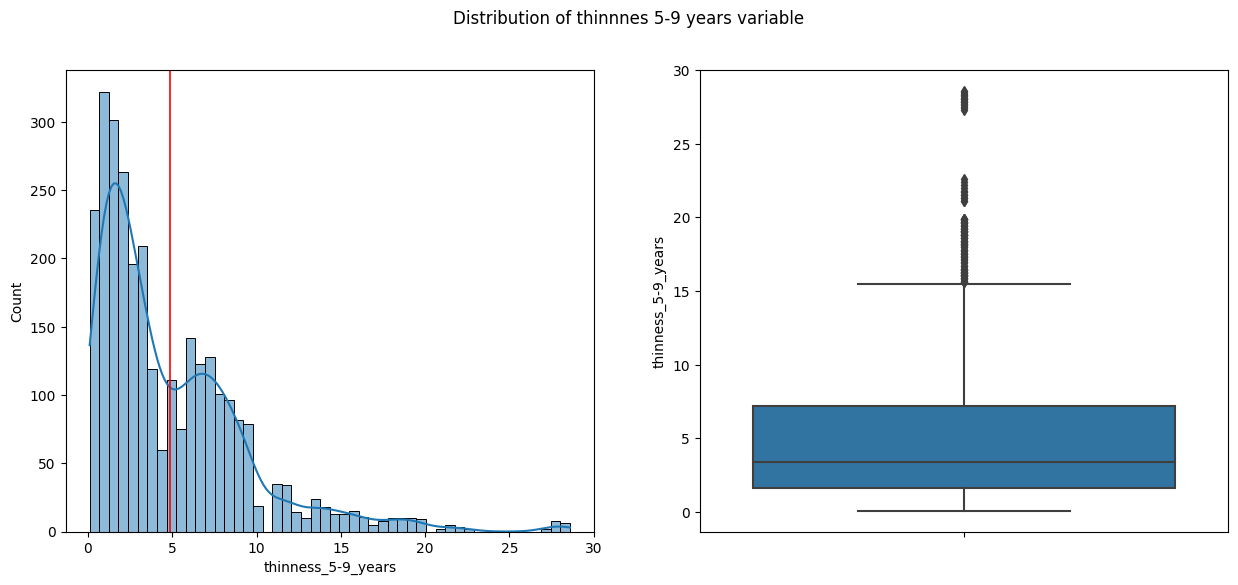

In [32]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.histplot(data=df,x=df['thinness_5-9_years'],bins=50,kde=True,ax=ax[0])
ax[0].axvline(df['thinness_5-9_years'].mean(),linewidth=1.2,color='red')

sns.boxplot(data=df,y=df['thinness_5-9_years'],ax=ax[1])

fig.suptitle("Distribution of thinnnes 5-9 years variable")
plt.show()

Text(0.5, 1.0, ' scatter plot for thinness 5-9 with correlation -0.46723051199193755')

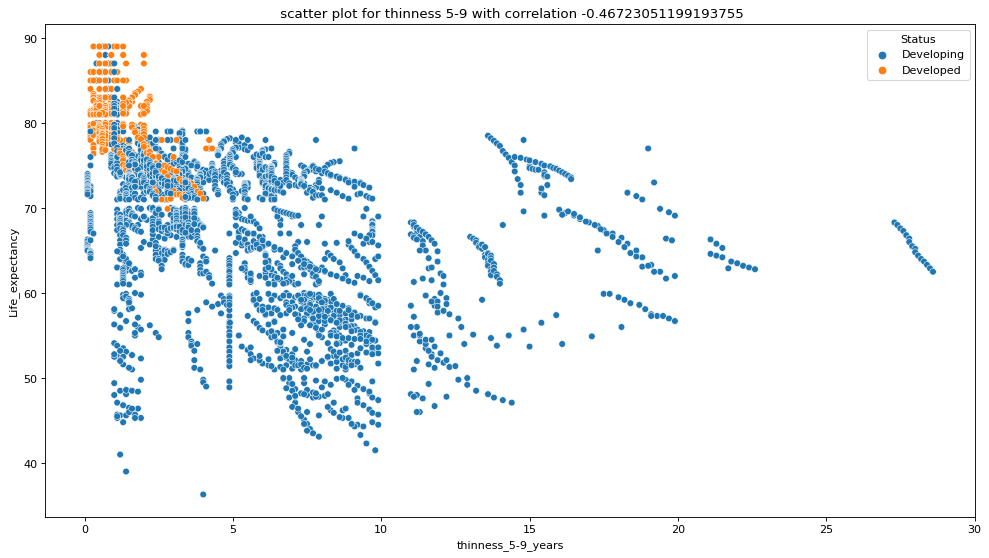

In [33]:
plt.figure(figsize=(15,8),dpi=80)
sns.scatterplot(data=df,x=df['thinness_5-9_years'],y=df['Life_expectancy'],hue='Status')
corr,p=pearsonr(df['thinness_5-9_years'],df['Life_expectancy'])
plt.title(f' scatter plot for thinness 5-9 with correlation {corr}')

interfernce:
    thinnes5-9 is -ive correlated with target variable
    developed country has highest life expectancy for thinnes5-9 %
    thinnes 5-9  distribution is rightly skewed

### Q6.7. Check the distribution of Income compostition of Resources variable and see how it affects the target variable

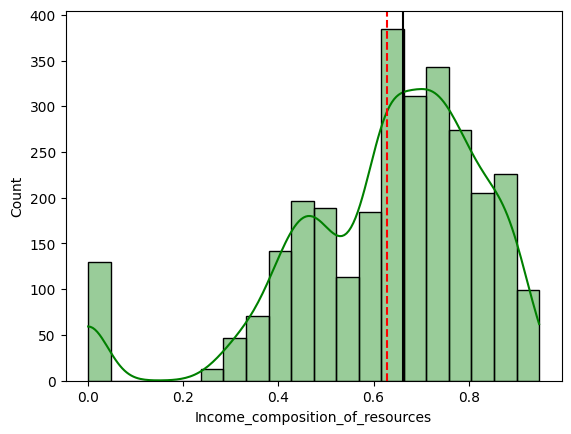

In [34]:
sns.histplot(df['Income_composition_of_resources'],color='green',alpha=0.4,kde=True,bins=20)
plt.axvline(df['Income_composition_of_resources'].mean(),color='red',linestyle='--')
plt.axvline(df['Income_composition_of_resources'].median(),color='black')

<Axes: ylabel='Income_composition_of_resources'>

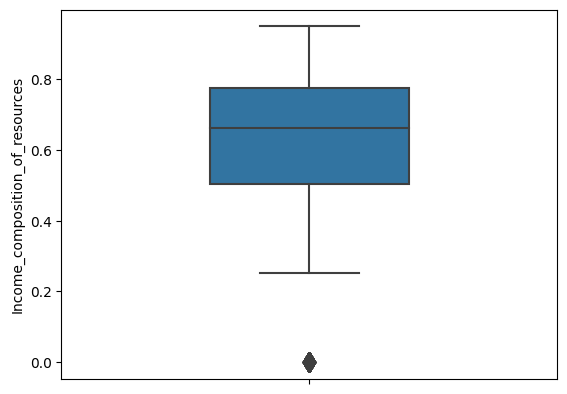

In [59]:
sns.boxplot(data=df,y=df['Income_composition_of_resources'],width=.4,fliersize=10)

Text(0.5, 1.0, 'distribution of income composition having correlation  of 0.692621408833336')

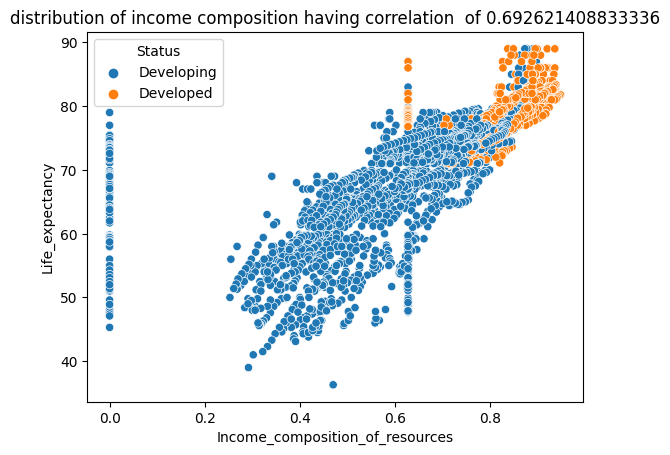

In [63]:
sns.scatterplot(data=df,x=df['Income_composition_of_resources'],y=df['Life_expectancy'],hue='Status')
corr,_=pearsonr(x=df['Income_composition_of_resources'],y=df['Life_expectancy'])
plt.title(f'distribution of income composition having correlation  of {corr}')

Interference-  1) income compistion is almost normally distributed with slightly left skewed
               2) most of the income composition lies i range of 0.5 to 0.8 
               3) life exectany is +ive correlated with income composition and developed countries with high income composition has ligh life expectancy 

### Q6.8. Check the distribution of Alcohol variable and see how it affects the target variable

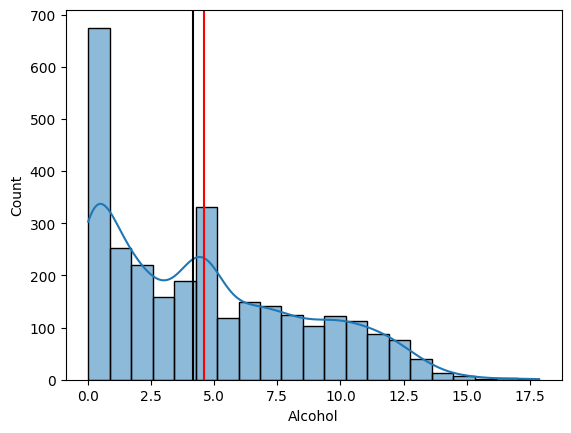

In [41]:
sns.histplot(data=df,x=df['Alcohol'],kde=True)
plt.axvline(df['Alcohol'].mean(),color='red')
plt.axvline(df['Alcohol'].median(),color='black')


<Axes: >

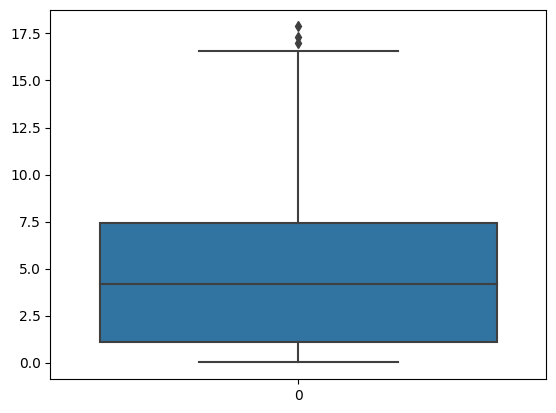

In [44]:
sns.boxplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Life_expectancy'>

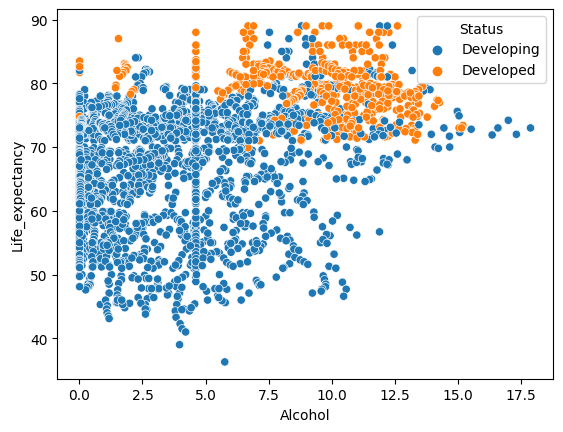

In [46]:
sns.scatterplot(data=df,x=df['Alcohol'],y=df['Life_expectancy'],hue='Status')

### Q6.9. Check the distribution of Percentage Expenditure variable and see how it affects the target variable

### Q6.10. Check the distribution of Hepatitis B variable and see how it affects the target variable

### Q6.11. Check the distribution of GDP variable and see how it affects the target variable

### Q6.12. Check the distribution of all the variables in the data and see how they affect each other (use pair plot)

In [ ]:
sns.pairplot(data=df)